# Conditional Graph tutorial

Conditional Graph

    • Implement conditional logic to route the flow of data in a graph different nodes.
    • Use START and END nodes to manage entry & exit points explicitly.
    • Design multiple node to perform different operations.
    • Create a route node to handle decision-making and control graph flow.

In [24]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

In [25]:
class AgentState(TypedDict):
    num1: int
    operation: str
    num2: int
    result: int

In [26]:
def adder(state: AgentState) -> AgentState:
    """This node is used for adding two numbers."""
    state['result'] = state['num1'] + state['num2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node is used for subtracting second number from first number."""
    state['result'] = state['num1'] - state['num2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node decide the next node according to the condition passed."""

    if state['operation'] == "+":
        return "addion_operation"
    elif state['operation'] == "-":
        return "subtraction_operation"
    

In [27]:
graph = StateGraph(AgentState)

graph.add_node("add node", adder)
graph.add_node("subtract node", subtractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges("router",
                            decide_next_node,
                            {
                                # Edge : Node
                                "addion_operation": "add node",
                                "subtraction_operation": "subtract node"
                            })
graph.add_edge("add node", END)
graph.add_edge("subtract node", END)

app = graph.compile()


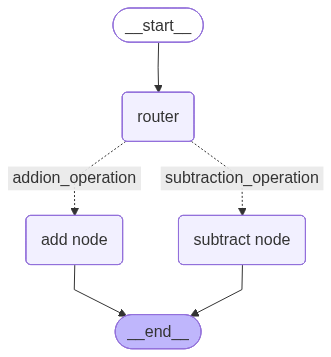

In [28]:

display(Image(app.get_graph().draw_mermaid_png()))


In [29]:
initial_state = AgentState(num1 = 10, operation = "-", num2 = 5)
message = app.invoke(initial_state)
message['result']

5

In [30]:
initial_state = AgentState(num1 = 10, operation = "+", num2 = 5)
message = app.invoke(initial_state)
message['result']

15